# Imports

In [1]:
import pandas as pd
import numpy as np
import os,  sys

import matplotlib.pyplot as plt
import matplotlib.colors as colors

# Find path to .py files
sys.path.append('/Users/benjaminwong/JupyterNotebooks/masters_pfti/notebooks/python/')

from grouping import Grouping, Resource
import plotter

# Data input and cleaning

In [2]:
# We will analyse the renamed "dmlz_assay" csv file in this notebook

assay = pd.read_csv("../data/ptfi_1/dmlz_assay.csv")
assay['Tons_Sampling'] = assay['Tons_Sampling'].astype(float)

rename_cols = list(assay.columns)[7:-1]
for col in rename_cols:
    assay = assay.rename(columns={col: col.split('_')[0].upper()})

In [3]:
assay

,SAMPLEID,HOLEID,DATESAMPLED,Oritype,BarcodeNo,Tons_Sampling,SampleWeight,CU,AU,AG,PB,ZN,F,C,S,SULFIDE,CNV,MPA,SamplingType
0,P14-10W_20201002,P14-10W,02-Oct-20,O,U010007,NaN,28.335,1.48,0.72,4.25,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN,Manual
1,P14-11E_20201002,P14-11E,02-Oct-20,O,U010008,NaN,29.650,1.09,1.29,3.99,0.01,0.00,NaN,NaN,NaN,NaN,NaN,NaN,Manual
2,P14-11W_20201002,P14-11W,02-Oct-20,O,U010009,NaN,31.135,2.73,1.61,9.87,0.01,0.03,NaN,NaN,NaN,NaN,NaN,NaN,Manual
3,P14-12W_20201002,P14-12W,02-Oct-20,O,U010011,NaN,30.450,2.55,1.45,6.05,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN,Manual
4,P14-13W_20201002,P14-13W,02-Oct-20,O,U010012,NaN,32.710,3.70,2.39,12.68,0.02,0.02,NaN,NaN,NaN,NaN,NaN,NaN,Manual
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22376,P23-14E_20221030,P23-14E,30-Oct-22,O,U035047,1374.649920,26.414,0.33,0.48,3.68,0.02,0.02,NaN,NaN,NaN,NaN,NaN,NaN,Manual
22377,P24-02E_20221030,P24-02E,30-Oct-22,O,U035048,638.551200,30.239,1.98,1.29,42.00,0.00,0.08,NaN,NaN,NaN,NaN,NaN,NaN,Manual
22378,P25-10W_20221030,P25-10W,30-Oct-22,O,U035049,910.884073,26.490,0.51,0.56,3.23,0.01,0.03,NaN,NaN,NaN,NaN,NaN,NaN,Manual
22379,P25-11W_20221030,P25-11W,30-Oct-22,O,U035050,1443.214367,26.995,0.46,0.44,2.36,0.01,0.02,NaN,NaN,NaN,NaN,NaN,NaN,Manual


Take the repeated `SAMPLEID` values and combine them as they shouldn't be treated as independent values

In [4]:
idxs = [
    [16209, 16210],
    [18704, 18705],
    [18739, 18740]
]
assay.iloc[np.array(idxs).flatten()]

,SAMPLEID,HOLEID,DATESAMPLED,Oritype,BarcodeNo,Tons_Sampling,SampleWeight,CU,AU,AG,PB,ZN,F,C,S,SULFIDE,CNV,MPA,SamplingType
16209,P16-03E_20220529,P16-03E,29-May-22,O,U028311,826.594225,21.980,0.98,0.25,3.85,0.08,0.04,NaN,NaN,NaN,NaN,NaN,NaN,Manual
16210,P16-03E_20220529,P16-03E,29-May-22,O,U028312,826.594225,10.003,0.71,0.33,6.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN,Manual
18704,P20-14W_20220808,P20-14W,08-Aug-22,O,U031029,3351.270720,19.980,0.27,0.35,0.71,0.01,0.01,NaN,NaN,NaN,NaN,NaN,NaN,Manual
18705,P20-14W_20220808,P20-14W,08-Aug-22,O,U031030,3351.270720,10.960,0.28,0.45,0.70,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN,Manual
18739,P14-11E_20220809,P14-11E,09-Aug-22,O,U031069,3217.499413,8.678,1.15,0.25,3.50,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN,Manual
18740,P14-11E_20220809,P14-11E,09-Aug-22,O,U031068,3217.499413,17.634,0.69,0.39,1.40,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN,Manual


In [10]:
SAMPLE_WEIGHT = 'SampleWeight'
numeric_cols = list(assay.columns)[7:-1]

# TODO: combine the data

# for combine_ids in idxs:
#     w = []
#     sample_data = {}
    
#     for id in combine_ids:
#         row = assay.loc[id]
        
#         w.append(row[SAMPLE_WEIGHT])
#         for col in numeric_cols:
#             if col not in sample_data:
#                 sample_data[col] = [row[col]]
#             else:
#                 sample_data[col].append(row[col])
    
#     combined_sample = {}
            
#     sample = assay.loc[combine_ids[0]].to_dict()
    
#     for id in combine_ids[1:]:
#         sample_add = assay.loc[id]
        
#         for col in numeric_cols:
#             if np.isnan(sample_add[col]):
#                 sample[col] = np.nan
#             else:
#                 sample[col] = (sample[col] * sample[SAMPLE_WEIGHT]) + (sample_add[col] * sample_add[SAMPLE_WEIGHT]) / (sample[SAMPLE_WEIGHT] + sample_add[SAMPLE_WEIGHT])
#         sample[SAMPLE_WEIGHT] += sample_add[SAMPLE_WEIGHT]
    
#     assay = assay.drop(axis=0, index=combine_ids)
#     df_dictionary = pd.DataFrame([sample])
#     assay = pd.concat([assay, df_dictionary], ignore_index=True)


In [11]:
assay

[8.678, 17.634]

# Group

Now that the data has been cleaned, we need to create groups and calculate heterogeneity

In [7]:
groups, elements = {}, ['CU', 'AU', 'AG']
dhids = assay['HOLEID'].unique()

for dhid in dhids:
    data = assay.query('HOLEID == @dhid')
    
    weights = data['SampleWeight']
    if weights.isnull().all():
        print(f"No data for {dhid}")
    else:
        groups[dhid] = Grouping(dhid)
        for element in elements:
            groups[dhid].add_resource(element, weights, data[element])

In [12]:
# groups['P14-12W'].resources['CU'].info

# Output

Save each element in each drillhole grouping as a seperate G-R graph when possible

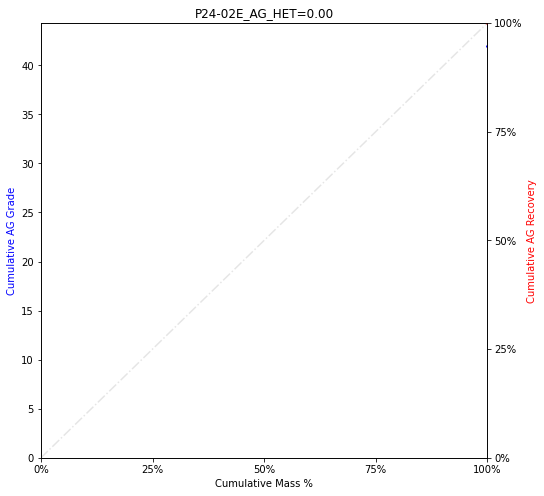

In [13]:
output_dir = "../outputs/het_analysis_dp_assay/"

fig = plt.figure()
fig.set_size_inches(8, 8)


for dhid, drillhole in groups.items():
    save_loc = output_dir + f'{dhid}/'
    if not os.path.exists(save_loc):
        os.makedirs(save_loc)

    for element in elements:
        if element in drillhole.resources:
            fig.clear()
            ax = fig.add_subplot()

            het = drillhole.resources[element].heterogeneity
            df = drillhole.resources[element].info
            
            if len(df) > 0:
                ax.set_title(f'{dhid}_{element}_HET={het:.2f}')
                plotter.plot_grade_recovery_curve(ax, df, element)

                fig.savefig(save_loc + f'{dhid}_{element}.svg', format='svg')

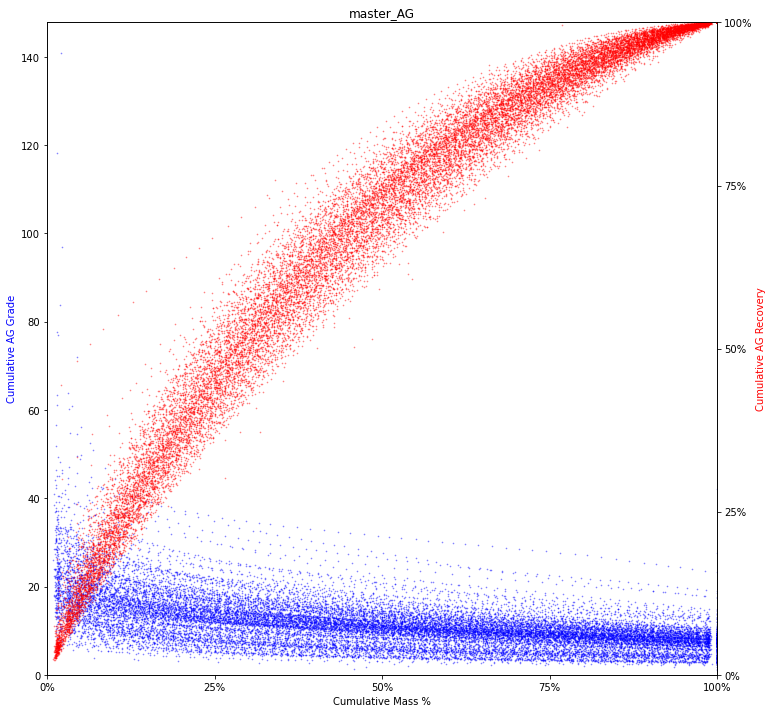

In [17]:
# then we want to graph the mass yield curves for all the individual elements
fig = plt.figure()
fig.set_size_inches(12, 12)

s = 0.5
alpha = 0.4

for element in elements:
    fig.clear()
    ax = fig.add_subplot()
    ax_sec = ax.twinx()

    for dhid, drillhole in groups.items():
        if element in drillhole.resources:
            plotter.plot_g_r(ax, ax_sec, drillhole.resources[element].info, s=s, alpha=alpha)
            
    plotter.set_g_r_labels(ax, ax_sec, element)
    ax.set_title(f'master_{element}')

    save_loc = output_dir + f'master/'
    if not os.path.exists(save_loc):
        os.makedirs(save_loc)
    fig.savefig(save_loc + f'master_{element}.png', format='png', dpi=200)

In [18]:
combined_data = Grouping('combined_data')

for element in elements:
    combined_data.add_resource(element, assay['SampleWeight'], assay[element])

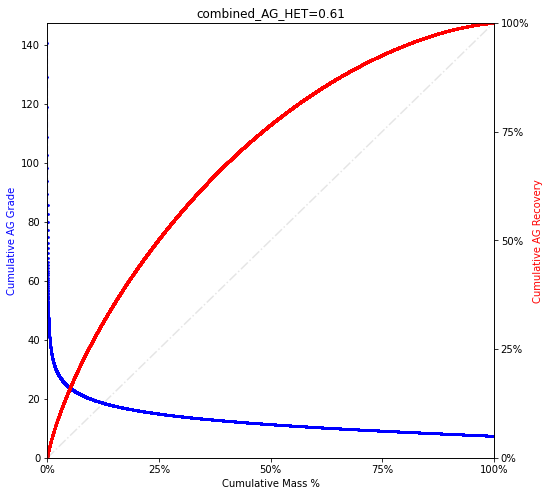

In [19]:
fig = plt.figure()
fig.set_size_inches(8, 8)

for element in elements:
    fig.clear()
    ax = fig.add_subplot()

    het = combined_data.resources[element].heterogeneity
    df = combined_data.resources[element].info
        
    if len(df) > 0:
        ax.set_title(f'combined_{element}_HET={het:.2f}')
        plotter.plot_grade_recovery_curve(ax, df, element)

        save_loc = output_dir + f'combined/'
        if not os.path.exists(save_loc):
            os.makedirs(save_loc)
        fig.savefig(save_loc + f'combined_{element}.png', format='png', dpi=200)